In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
# URL of the raw CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the dataset
try:
    data = pd.read_csv(url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")


Data loaded successfully.


In [3]:
# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe(include='all'))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


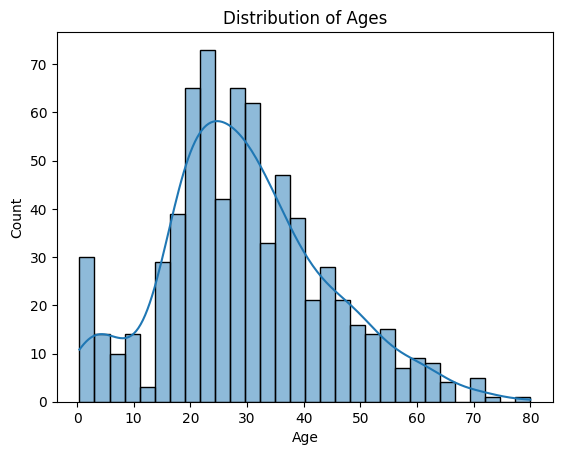

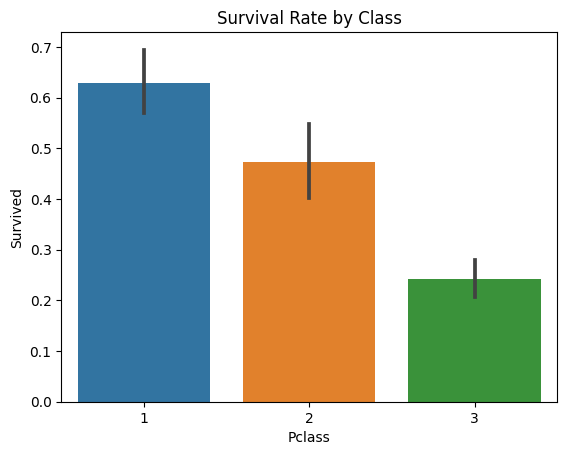

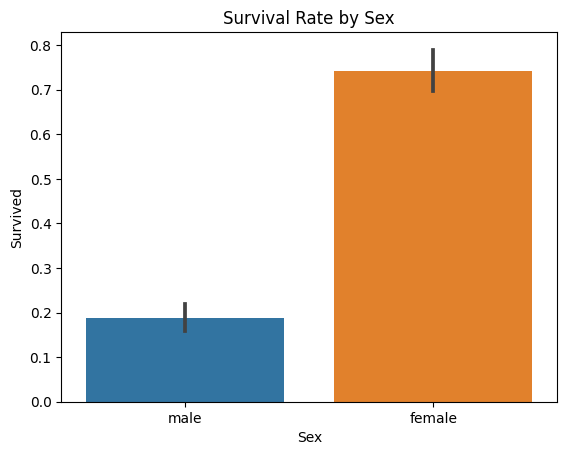

In [4]:
import seaborn as sns

# Plot the distribution of ages
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Ages')
plt.show()

# Plot survival rate by class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

# Plot survival rate by sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()


In [5]:
# Drop columns that won't be used for modeling
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = data['Survived']

# Define categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)


In [6]:
# Already done during the preprocessing step


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [8]:
# Define and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [10]:
# Example prediction for a new sample
sample = X_test[0].reshape(1, -1)  # Reshape to fit the model input
prediction = model.predict(sample)
print('Prediction for the sample:', prediction)


Prediction for the sample: [0]
